In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Airbnb Data/Listings.csv
/kaggle/input/Airbnb Data/Reviews.csv
/kaggle/input/Airbnb Data/Reviews_data_dictionary.csv
/kaggle/input/Airbnb Data/Listings_data_dictionary.csv


<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Impact of Regulation on AirBnB business in Paris
</div>


![Paris Airbnb View](https://media-cdn.tripadvisor.com/media/attractions-splice-spp-674x446/07/1a/f3/0d.jpg)

## Executive Summary

- **Rapid Growth Pre-2017**: Airbnb in Paris expanded quickly, with a surge of new hosts entering the market until 2016.  
- **Regulatory Shift in 2017**: The introduction of stricter rental regulations slowed new host entries, reducing supply growth.  
- **Resilient Demand**: Traveler demand remained strong, leading to a supply-demand gap and upward pressure on prices.  
- **Key Opportunities**: Success now depends on focusing on premium localities, implementing dynamic pricing, and adapting to regulatory constraints.  


In [2]:
reviews_dict = pd.read_csv(r"/kaggle/input/Airbnb Data/Reviews_data_dictionary.csv")

In [3]:
reviews_dict

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


In [4]:
reviews = pd.read_csv(r"/kaggle/input/Airbnb Data/Reviews.csv")

In [5]:
reviews

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859
...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516
5373139,47823964,727963021,2021-01-31,76411977
5373140,47896175,728548625,2021-02-02,71370946
5373141,47900451,727399287,2021-01-29,109011160


<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Importing Data and Exploring Column Information
</div>


In [6]:
listings_dict = pd.read_csv(r"/kaggle/input/Airbnb Data/Listings_data_dictionary.csv")

In [7]:
listings_dict

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


In [8]:
listings = pd.read_csv(r"/kaggle/input/Airbnb Data/Listings.csv",
                      encoding = "ISO-8859-1", low_memory=False)

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [11]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [12]:
listings["city"].value_counts()

city
Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: count, dtype: int64

<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Filtering rows to show only Paris data along with relevant columns
</div>

In [13]:
paris_listings = listings[listings["city"] == 'Paris']
paris_listings = paris_listings.loc[:,["listing_id","host_since","neighbourhood","city","accommodates","price"]]

In [14]:
paris_listings

,listing_id,host_since,neighbourhood,city,accommodates,price
0,281420,2011-12-03,Buttes-Montmartre,Paris,2,53
1,3705183,2013-11-29,Buttes-Montmartre,Paris,2,120
2,4082273,2014-07-31,Elysee,Paris,2,89
3,4797344,2013-12-17,Vaugirard,Paris,2,58
4,4823489,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...,...
279707,38338635,2015-04-13,Observatoire,Paris,2,120
279708,38538692,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,38683356,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,39659000,2015-07-16,Popincourt,Paris,2,105


<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Removing nulls
</div>


In [15]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     64690 non-null  int64 
 1   host_since     64657 non-null  object
 2   neighbourhood  64690 non-null  object
 3   city           64690 non-null  object
 4   accommodates   64690 non-null  int64 
 5   price          64690 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.5+ MB


In [16]:
paris_listings.isna().sum()

listing_id        0
host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [17]:
paris_listings["host_since"] = pd.to_datetime(paris_listings["host_since"])

In [18]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     64690 non-null  int64         
 1   host_since     64657 non-null  datetime64[ns]
 2   neighbourhood  64690 non-null  object        
 3   city           64690 non-null  object        
 4   accommodates   64690 non-null  int64         
 5   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.5+ MB


In [19]:
paris_listings.describe()

,listing_id,host_since,accommodates,price
count,6.469000e+04,64657,64690.000000,64690.000000
mean,2.423686e+07,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2.577000e+03,2008-08-30 00:00:00,0.000000,0.000000
25%,1.180961e+07,2014-03-09 00:00:00,2.000000,59.000000
50%,2.394850e+07,2015-07-07 00:00:00,2.000000,80.000000
75%,3.720798e+07,2017-05-29 00:00:00,4.000000,120.000000
max,4.809185e+07,2021-02-07 00:00:00,16.000000,12000.000000
std,1.432657e+07,NaN,1.588766,214.433668


<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Removing zeros since they indicate missing data
</div>


In [20]:
paris_listings = paris_listings[(paris_listings["price"]!=0)] 

In [21]:
paris_listings.describe()

,listing_id,host_since,accommodates,price
count,6.462800e+04,64595,64628.000000,64628.000000
mean,2.421767e+07,2015-10-30 22:46:09.985293056,3.040602,113.204942
min,2.577000e+03,2008-08-30 00:00:00,1.000000,8.000000
25%,1.179502e+07,2014-03-09 00:00:00,2.000000,59.000000
50%,2.391765e+07,2015-07-06 00:00:00,2.000000,80.000000
75%,3.717923e+07,2017-05-25 00:00:00,4.000000,120.000000
max,4.809185e+07,2021-02-07 00:00:00,16.000000,12000.000000
std,1.431997e+07,NaN,1.587078,214.507874


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 

<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Detecting Outliers
</div>


<Axes: >

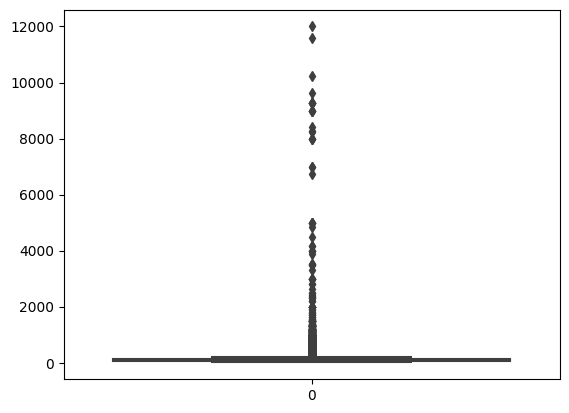

In [23]:
sns.boxplot(paris_listings["price"])

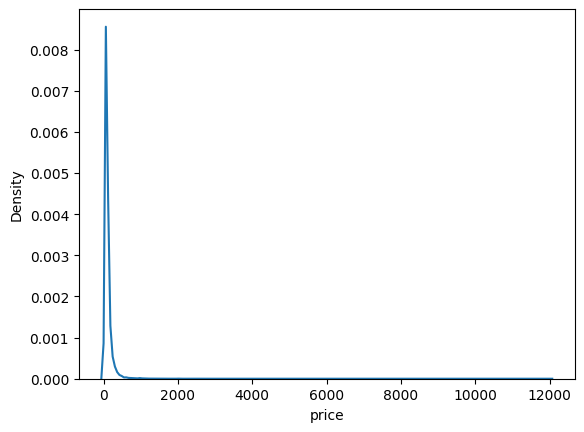

In [24]:
sns.kdeplot(paris_listings["price"])
plt.show()

In [25]:
paris_listings["price"].quantile(0.75),paris_listings["price"].quantile(0.5),paris_listings["price"].quantile(0.25)

(120.0, 80.0, 59.0)

In [26]:
upper_limit= np.mean(paris_listings["price"]) + 3*np.std(paris_listings["price"])

<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Removing Properties with Exponentially high prices, 3 Standard Deviation Away
</div>

In [27]:
paris_listings = paris_listings[paris_listings["price"]<upper_limit]

In [28]:
paris_listings.describe()

,listing_id,host_since,accommodates,price
count,6.422500e+04,64192,64225.000000,64225.000000
mean,2.417615e+07,2015-10-28 06:37:15.643070720,3.018497,103.215228
min,2.577000e+03,2008-08-30 00:00:00,1.000000,8.000000
25%,1.175164e+07,2014-03-07 00:00:00,2.000000,59.000000
50%,2.383639e+07,2015-07-05 00:00:00,2.000000,80.000000
75%,3.714336e+07,2017-05-20 00:00:00,4.000000,119.000000
max,4.809185e+07,2021-02-07 00:00:00,16.000000,756.000000
std,1.431464e+07,NaN,1.528636,81.351989


In [29]:
paris_listings.describe(include = "object")

,neighbourhood,city
count,64225,64225
unique,20,1
top,Buttes-Montmartre,Paris
freq,7208,64225


In [30]:
paris_listings["neighbourhood"].value_counts()

neighbourhood
Buttes-Montmartre      7208
Popincourt             6195
Vaugirard              4800
Enclos-St-Laurent      4603
Batignolles-Monceau    4310
Menilmontant           3751
Buttes-Chaumont        3712
Passy                  3160
Opera                  3143
Temple                 2921
Reuilly                2644
Observatoire           2472
Gobelins               2271
Bourse                 2147
Pantheon               2128
Luxembourg             1975
Hotel-de-Ville         1960
Palais-Bourbon         1742
Elysee                 1694
Louvre                 1389
Name: count, dtype: int64

In [31]:
paris_listings_avg_price = paris_listings.groupby("neighbourhood").agg({"price":"mean"})
paris_listings_avg_price.sort_values("price",ascending = False,inplace =  True)

<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Looking at the Most relevant Localities in Paris
</div>

In [32]:
paris_listings_avg_price

,price
neighbourhood,
Elysee,170.344746
Louvre,149.980562
Luxembourg,144.372658
Palais-Bourbon,142.128588
Hotel-de-Ville,137.329082
Passy,132.566772
Bourse,132.476479
Temple,126.461143
Pantheon,117.950658


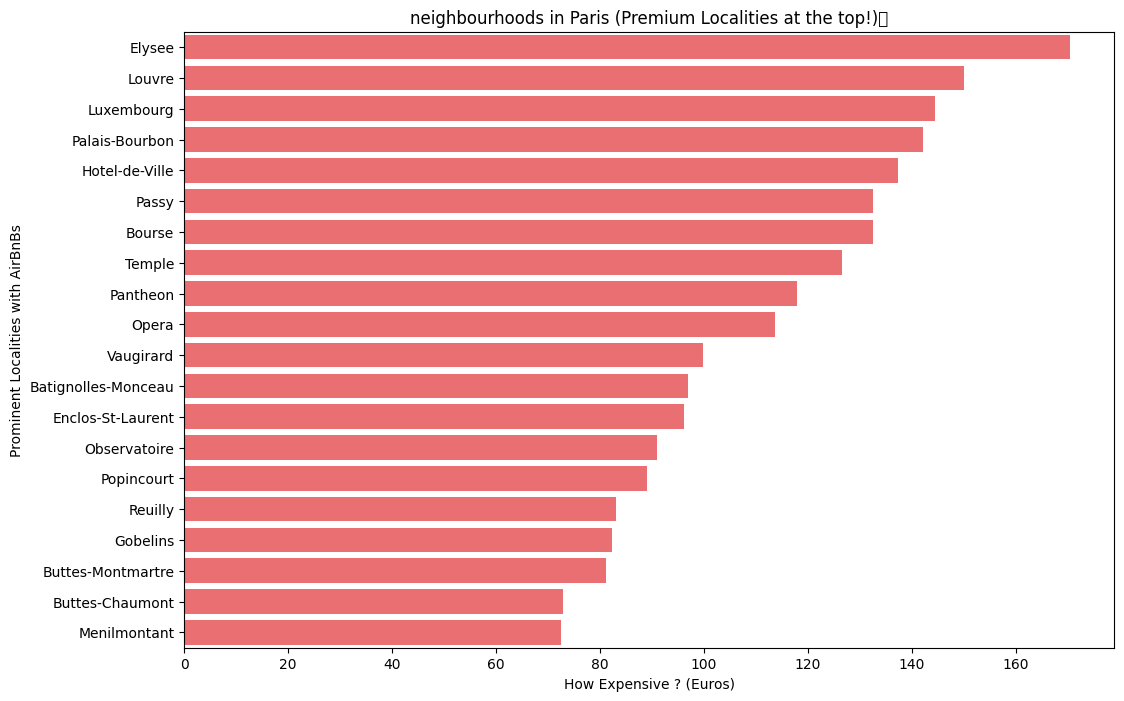

In [33]:
plt.figure(figsize = (12,8))
sns.barplot(data = paris_listings_avg_price,
           x = "price",
            y = paris_listings_avg_price.index,color = "#ff5a5f")
plt.title("neighbourhoods in Paris (Premium Localities at the top!)	")
plt.xlabel("How Expensive ? (Euros)")
plt.ylabel("Prominent Localities with AirBnBs")
plt.show()

### Insight on Average Nightly Prices by Locality in Paris

- The **most expensive areas** are central and prestigious districts such as **Elysee (€170/night)**, **Louvre (€150/night)**, and **Luxembourg (€144/night)**. These neighborhoods are close to iconic landmarks, luxury shopping, and government or cultural institutions, which drives up demand and prices.  

- Mid-range prices are seen in areas like **Temple (€126/night)**, **Pantheon (€118/night)**, and **Opera (€114/night)**. These are still popular, but slightly less exclusive compared to the top-tier localities.  

- The **more affordable neighborhoods** include **Menilmontant (€72/night)**, **Buttes-Chaumont (€73/night)**, and **Buttes-Montmartre (€81/night)**. These districts are further from the tourist-heavy city center but may appeal to budget-conscious travelers or those seeking a more local experience.  

**Overall:** The price gradient reflects proximity to cultural hotspots and affluence of the locality. Central, historic, and tourist-heavy areas command higher prices, while outer neighborhoods offer budget-friendly options.


<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Does Price Change as per number of Guests?
</div>


In [34]:
paris_listings_accommodates = paris_listings.groupby("accommodates").agg({"price":"mean"})
paris_listings_accommodates.sort_values("price",ascending = False,inplace =  True)


In [35]:
paris_listings_accommodates

,price
accommodates,
13,475.000000
14,438.125000
11,419.880000
12,396.466667
15,337.250000
9,335.807229
10,329.181818
8,271.328909
7,231.254902


### Insight on Accommodation Capacity and Average Prices

- As expected, listings that accommodate **more guests** tend to have **higher nightly prices**.  
  - Small units for **1–2 guests** are the cheapest, averaging around **€56–79/night**.  
  - Medium-sized listings for **4–6 guests** range from **€118–198/night**.  
  - Large properties hosting **10+ guests** are much more expensive, often exceeding **€300/night**.

- The **highest average prices** are for large group accommodations:  
  - **13 guests: €475/night**  
  - **14 guests: €438/night**  
  - **11 guests: €420/night**  

- Interestingly, beyond a certain point (e.g., 15–16 guests), the average price does not continue to rise proportionally, suggesting a niche but limited demand for **very large properties**.

**Overall:** Prices scale with accommodation size, but the relationship is not perfectly linear. Small apartments dominate budget travel, while large listings cater to premium or group stays, commanding much higher rates.


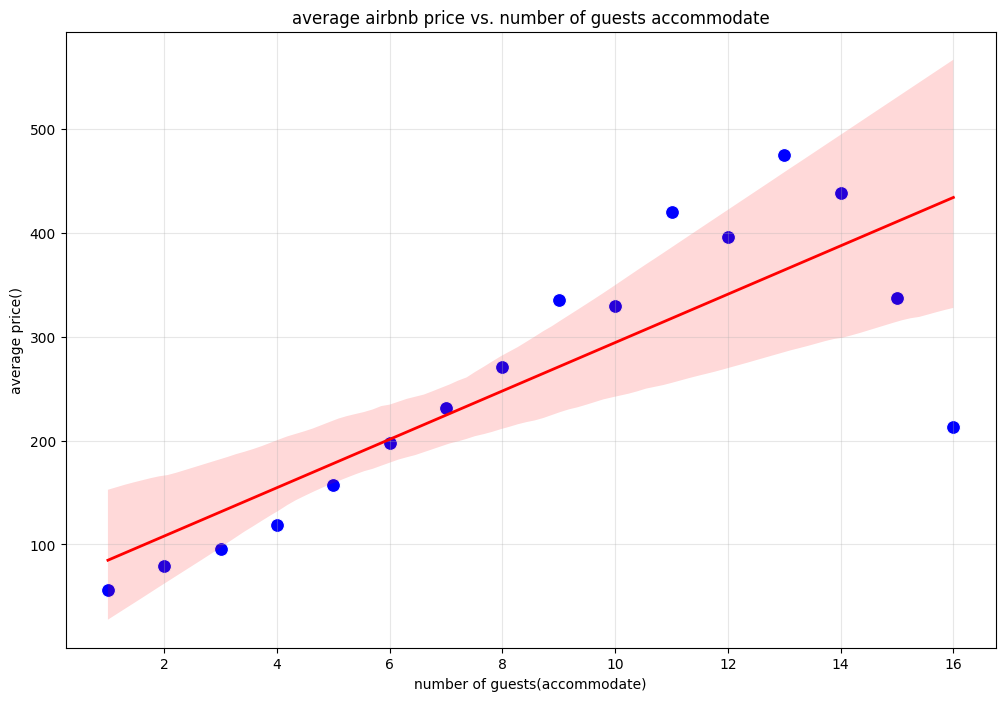

In [36]:
plt.figure(figsize = (12,8))
sns.scatterplot(x="accommodates",y = "price",data = paris_listings_accommodates,s=100,color = "blue")

sns.regplot(x= paris_listings_accommodates.index,y="price",data = paris_listings_accommodates,
           scatter = False,color = "red",line_kws={"linewidth":2})
           
plt.title("average airbnb price vs. number of guests accommodate")
plt.xlabel("number of guests(accommodate)")
plt.ylabel("average price()")
plt.grid(alpha=0.3)
plt.show()

<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Extracting Year to see time series Analysis of Price and New Host Joining
</div>


In [37]:
paris_listings["year_of_listings"] =  paris_listings["host_since"].dt.year

### Why Use the *host_since* Column?

The **`host_since`** column records the date when a host first listed their property on Airbnb.  
Analyzing this column can provide valuable business insights because:

- **Market Entry Timing**: It shows when new hosts are joining the platform, which reflects Airbnb’s growth phases.  
- **Host Experience**: Longer tenure may correlate with more reliable hosts and better reviews, whereas recent hosts might need onboarding support.  
- **Business Cycles**: Peaks in new host sign-ups can indicate favorable periods for the short-term rental business (e.g., tourism booms, policy changes, or high-demand seasons).  
- **Impact of Regulations**: Sudden drops in new host listings may highlight external factors such as regulations or economic conditions affecting supply.  

In short, **tracking the `host_since` column helps identify the best times when the Airbnb business environment was most attractive for new entrants**, which can act as a proxy for "good times" in the market.


In [38]:
paris_listings.head()

,listing_id,host_since,neighbourhood,city,accommodates,price,year_of_listings
0,281420,2011-12-03,Buttes-Montmartre,Paris,2,53,2011.0
1,3705183,2013-11-29,Buttes-Montmartre,Paris,2,120,2013.0
2,4082273,2014-07-31,Elysee,Paris,2,89,2014.0
3,4797344,2013-12-17,Vaugirard,Paris,2,58,2013.0
4,4823489,2014-12-14,Passy,Paris,2,60,2014.0


In [39]:
paris_listings_final_analysis = paris_listings.groupby("year_of_listings").agg({
    "listing_id":"count","price":"mean"
})
paris_listings_final_analysis 

,listing_id,price
year_of_listings,,
2008.0,4,77.750000
2009.0,105,142.114286
2010.0,415,120.995181
2011.0,1333,109.597149
2012.0,4576,107.654283
2013.0,8128,104.295153
2014.0,10889,96.403067
2015.0,12100,96.397438
2016.0,8767,100.576366


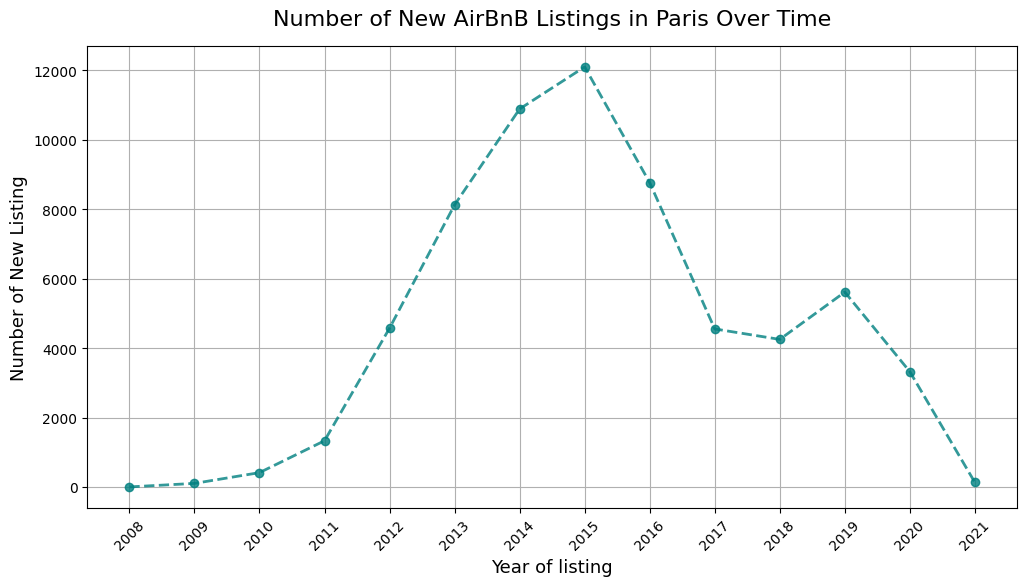

In [40]:
plt.figure(figsize = (12,6))

plt.plot(paris_listings_final_analysis .index,paris_listings_final_analysis ["listing_id"],
        marker = 'o',linestyle = "--",linewidth = 2,color =  "teal",alpha = 0.8)
plt.title("Number of New AirBnB Listings in Paris Over Time",fontsize = 16,pad = 15)
plt.xlabel("Year of listing",fontsize = 13)
plt.ylabel("Number of New Listing",fontsize = 13)

plt.grid()
plt.xticks(paris_listings_final_analysis.index,rotation =  45)
plt.show()

### Insight on Airbnb Listings Over Time

- From **2008 to 2015**, the number of new Airbnb listings in Paris grew rapidly, peaking around **2015–2016** with more than 12,000 new hosts entering the market. This indicates a period of **high attractiveness and strong growth** for Airbnb, with both **supply (hosts)** and **demand (customers)** expanding significantly.  

- Starting in **2017**, there is a sharp decline in the number of new listings. This coincides with the **regulation imposed in Paris in 2017** that aimed to control short-term rentals due to housing shortages. The regulation clearly discouraged many new hosts from entering the market, leading to a **reduction in supply growth**.  

- The continued decline after 2017 suggests that the **barriers to entry remained high**, keeping potential new hosts from joining. On the demand side, while tourists and customers likely still sought Airbnbs, the **limited supply growth** would have constrained options and potentially increased prices.  

**Overall:**  
- **Pre-2017:** Strong growth in both supply (hosts) and demand (customers).  
- **Post-2017:** Regulation led to a slowdown in host entry, reducing supply expansion, even though customer demand likely remained steady or growing.


In [41]:
paris_listings_final_analysis 

,listing_id,price
year_of_listings,,
2008.0,4,77.750000
2009.0,105,142.114286
2010.0,415,120.995181
2011.0,1333,109.597149
2012.0,4576,107.654283
2013.0,8128,104.295153
2014.0,10889,96.403067
2015.0,12100,96.397438
2016.0,8767,100.576366


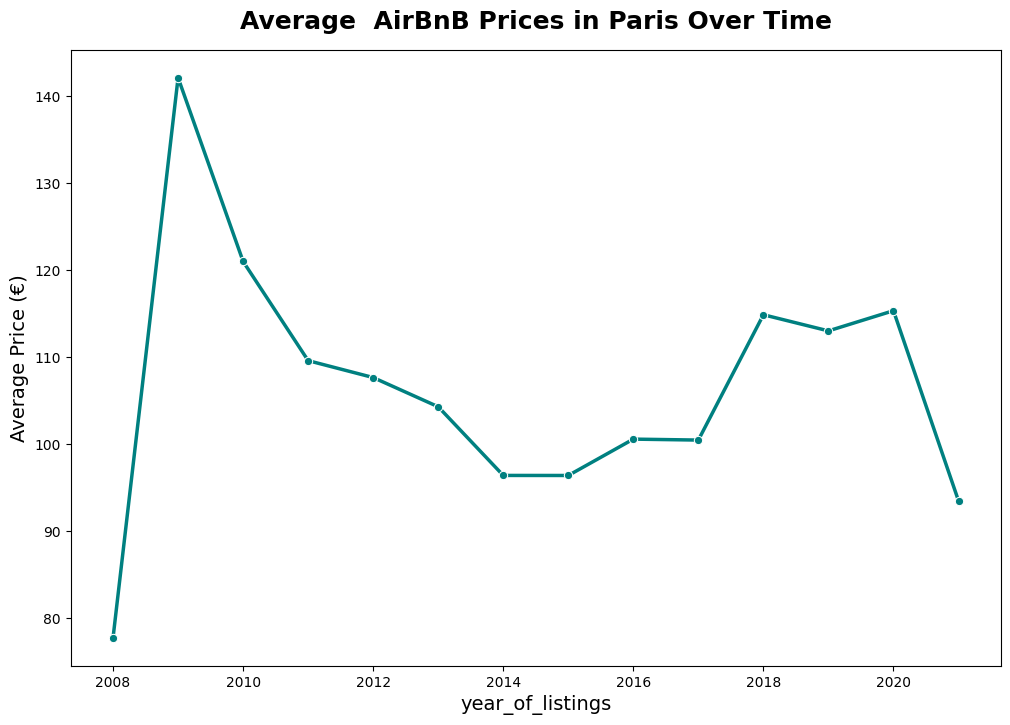

In [42]:
plt.figure(figsize = (12,8))
sns.lineplot(
    x="year_of_listings",
    y="price",
    data=paris_listings_final_analysis,
    marker="o",
    linewidth=2.5,
    color="teal"
)

plt.title("Average  AirBnB Prices in Paris Over Time",fontsize = 18,fontweight="bold",pad = 15)
plt.xlabel("year_of_listings",fontsize = 14)
plt.ylabel("Average Price (€)",fontsize = 14)
plt.show()

### Insight on Average Airbnb Prices Over Time

- **2008–2009:** Prices started relatively low (~€78) but spiked sharply in 2009 to over **€140**, possibly reflecting early market scarcity and premium pricing when Airbnb first entered Paris.  

- **2010–2014:** A consistent **downward trend** is visible, with average prices falling from ~€121 to ~€96. This suggests **increasing competition and supply** as more hosts entered the market, leading to price normalization.  

- **2015–2017:** Prices stabilized at just under €100–€101/night, marking a period of equilibrium between supply growth and customer demand.  

- **2018–2020:** Prices rose again to around **€115/night**, despite stricter **2017 regulations**. With supply growth slowing, fewer new listings may have pushed average prices upward as demand remained strong.  

- **2021 onwards:** A decline back toward ~€93 is visible, possibly reflecting **pandemic-related demand shocks** and a temporary oversupply compared to lower travel activity.  

**Overall:**  
- In the **early years**, scarcity kept prices high.  
- As supply expanded, **competition drove prices down**.  
- **Regulation (2017)** limited supply growth, causing a **price rebound**.  
- **Pandemic effects** likely caused the post-2020 decline.  


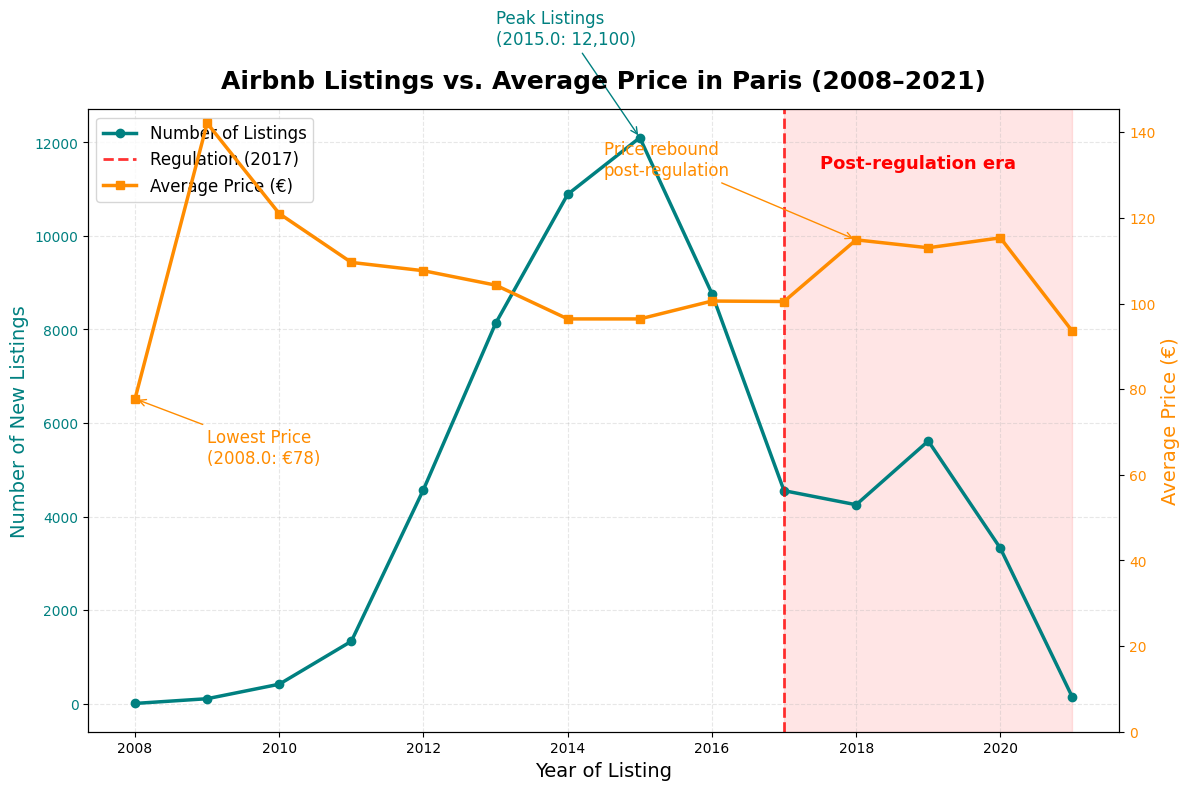

In [43]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot number of listings (left y-axis)
ax.plot(
    paris_listings_final_analysis.index, 
    paris_listings_final_analysis["listing_id"], 
    color="teal", linewidth=2.5, marker="o", label="Number of Listings"
)
ax.set_xlabel("Year of Listing", fontsize=14)
ax.set_ylabel("Number of New Listings", fontsize=14, color="teal")
ax.tick_params(axis="y", labelcolor="teal")

# Secondary y-axis for price
ax2 = ax.twinx()
ax2.plot(
    paris_listings_final_analysis.index, 
    paris_listings_final_analysis["price"], 
    color="darkorange", linewidth=2.5, marker="s", label="Average Price (€)"
)
ax2.set_ylabel("Average Price (€)", fontsize=14, color="darkorange")
ax2.tick_params(axis="y", labelcolor="darkorange")
ax2.set_ylim(0)

# Titles and grid
plt.title("Airbnb Listings vs. Average Price in Paris (2008–2021)", fontsize=18, fontweight="bold", pad=15)
ax.grid(alpha=0.3, linestyle="--")

# Highlight regulation year (2017)
ax.axvline(x=2017, color="red", linestyle="--", linewidth=2, alpha=0.8, label="Regulation (2017)")

# Shade post-2017 period
ax.axvspan(2017, paris_listings_final_analysis.index.max(), color="red", alpha=0.1)

# Add text inside shaded area
ax.text(
    2017.5, 
    ax.get_ylim()[1]*0.9,   # position text near the top of shaded area
    "Post-regulation era", 
    color="red", fontsize=13, fontweight="bold"
)

# ---- Annotations ----
# Peak in listings (2015–2016)
peak_year = paris_listings_final_analysis["listing_id"].idxmax()
peak_val = paris_listings_final_analysis["listing_id"].max()
ax.annotate(
    f"Peak Listings\n({peak_year}: {peak_val:,})",
    xy=(peak_year, peak_val),
    xytext=(peak_year-2, peak_val+2000),
    arrowprops=dict(arrowstyle="->", color="teal"),
    fontsize=12, color="teal"
)

# Lowest price point (2014)
low_year = paris_listings_final_analysis["price"].idxmin()
low_val = paris_listings_final_analysis["price"].min()
ax2.annotate(
    f"Lowest Price\n({low_year}: €{low_val:.0f})",
    xy=(low_year, low_val),
    xytext=(low_year+1, low_val-15),
    arrowprops=dict(arrowstyle="->", color="darkorange"),
    fontsize=12, color="darkorange"
)

# Price rebound post-2017
ax2.annotate(
    "Price rebound\npost-regulation",
    xy=(2018, paris_listings_final_analysis.loc[2018, "price"]),
    xytext=(2014.5, 130),
    arrowprops=dict(arrowstyle="->", color="darkorange"),
    fontsize=12, color="darkorange"
)

# Legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, fontsize=12, loc="upper left")

plt.tight_layout()
plt.show()

## Final Insights and Recommendations

### Key Insights
1. **Strong Growth Pre-2017**  
   - Paris experienced rapid growth in Airbnb listings between 2008–2016, peaking in 2015–2016.  
   - This reflects high demand and strong attractiveness of the short-term rental market.  

2. **Impact of 2017 Regulations**  
   - The number of new hosts dropped sharply after the 2017 regulations that restricted short-term rentals.  
   - While demand from travelers remained steady, the reduced inflow of hosts slowed supply growth.  

3. **Price Dynamics**  
   - Average prices decreased between 2010–2014 due to increased competition from new hosts.  
   - Post-2017, prices rebounded as supply growth slowed, suggesting a supply-demand imbalance.  
   - During the pandemic (2020–2021), prices declined again due to demand shocks.  

4. **Locality-Based Trends**  
   - Central, prestigious areas (Louvre, Elysee, Luxembourg) command premium prices.  
   - Outer neighborhoods (Menilmontant, Buttes-Chaumont) remain more affordable, appealing to budget travelers.  

5. **Accommodation Capacity**  
   - Prices scale with the number of guests a listing can accommodate, but not proportionally.  
   - Large properties (10+ guests) cater to a niche segment, with very high average nightly prices.  

---

### Recommendations for the Business
1. **Focus on High-Demand Localities**  
   - Prioritize investments and partnerships in central, premium areas where demand is strongest and prices are resilient.  
   - Simultaneously, target budget-friendly neighborhoods to attract cost-sensitive travelers.  

2. **Leverage Supply-Demand Gap Post-2017**  
   - With stricter entry for new hosts, existing hosts can capture greater market share.  
   - Encourage quality improvements and unique value-adds (professional photos, amenities, flexible check-in) to stand out.  

3. **Diversify Accommodation Sizes**  
   - Promote medium-capacity listings (3–6 guests) that balance affordability and profitability.  
   - Large properties should be marketed as group or family stays, potentially bundling with experiences.  

4. **Dynamic Pricing Strategy**  
   - Implement data-driven pricing models that account for seasonality, locality, and capacity.  
   - Post-pandemic recovery presents an opportunity to adjust prices as travel demand rebounds.  

5. **Customer-Centric Growth**  
   - Enhance guest experience through verified reviews, safety measures, and customer support.  
   - Focus on repeat customers and long-term stays, especially in regulatory-constrained markets.  

6. **Policy Adaptation**  
   - Stay agile in response to local regulations.  
   - Explore partnerships or compliance-based strategies (e.g., registered professional hosting) to maintain competitiveness.  

---
✅ **Overall:** Paris Airbnb experienced strong growth until 2017, after which regulations constrained supply. Demand has remained steady, pushing prices higher post-regulation. Businesses should focus on **balancing premium and budget offerings, adopting dynamic pricing, and aligning with regulatory frameworks** to remain competitive in this evolving market.


<div style="background-color:#00a699; padding:25px; border-radius:12px; text-align:center;">
  <h1 style="color:white;">✅ Thank You</h1>
  <p style="color:white; font-size:18px;">
    We appreciate your time reviewing this analysis.<br>
    For any questions or discussions, feel free to connect.
  </p>
</div>

<p style="text-align:center; color:gray; font-size:14px; margin-top:10px;">
  Airbnb Paris Analysis | 2025
</p>
